# Example 2.7.

### High-dimensional payoff function

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler,normalize
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import os
import IPython

Execute the next line only if you want to use a GPU for the training

In [2]:
# IF GPU:
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

We define functions for readinf the data and for building the model

In [3]:
# # Read Data
def read_data(xpath,ypath):
    df_x = pd.read_csv(xpath, header=None)
    df_x = df_x.dropna()

    df_y = pd.read_csv(ypath, header=None)
    df_y = df_y.dropna()
    
    
    # Deleting arbitrage Scenarios
    df_x = df_x.drop(df_x[df_y.iloc[:,0] < 0].index)
    df_y = df_y.drop(df_y[df_y.iloc[:,0] < 0].index)
    
    df_y = df_y.iloc[:,0]
    
    return df_x,df_y

In [4]:
def build_model(x,nr_neurons = 256,regul = 0.00):

    model = keras.Sequential([
        layers.Dense(nr_neurons,kernel_regularizer=regularizers.l2(regul),activation='relu',input_shape=[1861]),
        layers.BatchNormalization(),
        layers.Dense(nr_neurons,kernel_regularizer=regularizers.l2(regul), activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(nr_neurons,kernel_regularizer=regularizers.l2(regul), activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(nr_neurons,kernel_regularizer=regularizers.l2(regul), activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(1)
      ])
    model.compile(loss='mse',
                    optimizer='adam',
                    metrics=['mae', 'mse'])
    scaler = StandardScaler().fit(x)
    return model, scaler

Reading Data

In [5]:
#### Reading data
X_train_1,y_train_1 = read_data('x_train_1.csv','y_train_1.csv')
X_train_2,y_train_2 = read_data('x_train_2.csv','y_train_2.csv')
X_train_3,y_train_3 = read_data('x_train_3.csv','y_train_3.csv')
X_train_4,y_train_4 = read_data('x_train_4.csv','y_train_4.csv')
X_train = X_train_1.append(X_train_2)
y_train = y_train_1.append(y_train_2)
X_train = X_train.append(X_train_3)
y_train = y_train.append(y_train_3)
X_train = X_train.append(X_train_4)
y_train = y_train.append(y_train_4)

X_test,y_test = read_data('x_test.csv','y_test.csv')

X_train, y_train = shuffle(X_train,y_train)
X_test, y_test = shuffle(X_test,y_test)

# # Reduce amount of training and testing data (to nice,even numbers).

X_train = X_train.iloc[:8000,:]
y_train = y_train.iloc[:8000]
X_test = X_test.iloc[:2000,:]
y_test = y_test.iloc[:2000]

We train the model

In [6]:
# Train the model
EPOCHS = 1000
neurons = 512
regul = 0
BATCH_SIZE = 256

model, scaler = build_model(X_train,neurons,regul)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

# # Fit the Data
history = model.fit(X_train_scaled, y_train,  epochs=EPOCHS,batch_size = BATCH_SIZE,
                    validation_split = 0.1, verbose=1,callbacks = [early_stop])

Train on 7200 samples, validate on 800 samples
Epoch 1/1000
7200/7200 [==============================] - 1s 201us/sample - loss: 18681.8593 - mae: 129.3970 - mse: 18681.8574 - val_loss: 12253.0782 - val_mae: 100.4310 - val_mse: 12253.0791
Epoch 2/1000
7200/7200 [==============================] - 0s 31us/sample - loss: 16878.2496 - mae: 127.6458 - mse: 16878.2520 - val_loss: 16424.2341 - val_mae: 114.0368 - val_mse: 16424.2344
Epoch 3/1000
7200/7200 [==============================] - 0s 30us/sample - loss: 15743.0520 - mae: 124.9329 - mse: 15743.0537 - val_loss: 15974.8209 - val_mae: 114.3017 - val_mse: 15974.8213
Epoch 4/1000
7200/7200 [==============================] - 0s 29us/sample - loss: 14826.0582 - mae: 121.4527 - mse: 14826.0576 - val_loss: 16723.7444 - val_mae: 116.3026 - val_mse: 16723.7441
Epoch 5/1000
7200/7200 [==============================] - 0s 29us/sample - loss: 13922.3136 - mae: 117.5048 - mse: 13922.3145 - val_loss: 16284.9112 - val_mae: 114.1832 - val_mse: 16284.91

7200/7200 [==============================] - 0s 28us/sample - loss: 29.9733 - mae: 4.2147 - mse: 29.9733 - val_loss: 54.1555 - val_mae: 6.1487 - val_mse: 54.1555
Epoch 47/1000
7200/7200 [==============================] - 0s 28us/sample - loss: 30.4069 - mae: 4.0668 - mse: 30.4069 - val_loss: 38.2098 - val_mae: 4.7929 - val_mse: 38.2098
Epoch 48/1000
7200/7200 [==============================] - 0s 26us/sample - loss: 29.4811 - mae: 4.2590 - mse: 29.4811 - val_loss: 22.5258 - val_mae: 3.1644 - val_mse: 22.5258
Epoch 49/1000
7200/7200 [==============================] - 0s 30us/sample - loss: 37.0297 - mae: 4.7815 - mse: 37.0297 - val_loss: 33.6216 - val_mae: 4.1152 - val_mse: 33.6216
Epoch 50/1000
7200/7200 [==============================] - 0s 28us/sample - loss: 34.8355 - mae: 4.5642 - mse: 34.8355 - val_loss: 49.3002 - val_mae: 5.9213 - val_mse: 49.3002
Epoch 51/1000
7200/7200 [==============================] - 0s 26us/sample - loss: 26.7217 - mae: 3.8622 - mse: 26.7217 - val_loss: 14.

7200/7200 [==============================] - 0s 27us/sample - loss: 33.8736 - mae: 4.6493 - mse: 33.8736 - val_loss: 45.0222 - val_mae: 4.9707 - val_mse: 45.0222
Epoch 93/1000
7200/7200 [==============================] - 0s 26us/sample - loss: 24.1972 - mae: 3.8609 - mse: 24.1972 - val_loss: 21.4290 - val_mae: 3.4300 - val_mse: 21.4290
Epoch 94/1000
7200/7200 [==============================] - 0s 28us/sample - loss: 26.9774 - mae: 3.9380 - mse: 26.9774 - val_loss: 16.4433 - val_mae: 3.1364 - val_mse: 16.4433
Epoch 95/1000
7200/7200 [==============================] - 0s 30us/sample - loss: 30.1796 - mae: 4.3569 - mse: 30.1796 - val_loss: 17.3685 - val_mae: 3.0884 - val_mse: 17.3685
Epoch 96/1000
7200/7200 [==============================] - 0s 26us/sample - loss: 26.5157 - mae: 4.0185 - mse: 26.5157 - val_loss: 13.7763 - val_mae: 2.6291 - val_mse: 13.7763
Epoch 97/1000
7200/7200 [==============================] - 0s 28us/sample - loss: 33.6900 - mae: 4.2218 - mse: 33.6900 - val_loss: 33.

7200/7200 [==============================] - 0s 26us/sample - loss: 27.4320 - mae: 3.9479 - mse: 27.4320 - val_loss: 10.9585 - val_mae: 2.6375 - val_mse: 10.9585
Epoch 139/1000
7200/7200 [==============================] - 0s 27us/sample - loss: 21.7410 - mae: 3.6058 - mse: 21.7410 - val_loss: 3.8653 - val_mae: 1.4783 - val_mse: 3.8653
Epoch 140/1000
7200/7200 [==============================] - 0s 30us/sample - loss: 35.0425 - mae: 4.5753 - mse: 35.0425 - val_loss: 13.6495 - val_mae: 2.6074 - val_mse: 13.6495
Epoch 141/1000
7200/7200 [==============================] - 0s 28us/sample - loss: 20.4217 - mae: 3.3046 - mse: 20.4217 - val_loss: 33.4294 - val_mae: 4.7387 - val_mse: 33.4294
Epoch 142/1000
7200/7200 [==============================] - 0s 26us/sample - loss: 28.1936 - mae: 4.1104 - mse: 28.1936 - val_loss: 20.2215 - val_mae: 3.2862 - val_mse: 20.2215
Epoch 143/1000
7200/7200 [==============================] - 0s 29us/sample - loss: 22.3737 - mae: 3.7222 - mse: 22.3737 - val_loss: 

Epoch 185/1000
7200/7200 [==============================] - 0s 28us/sample - loss: 23.6162 - mae: 3.8542 - mse: 23.6162 - val_loss: 9.4536 - val_mae: 2.3859 - val_mse: 9.4536
Epoch 186/1000
7200/7200 [==============================] - 0s 28us/sample - loss: 22.2386 - mae: 3.8417 - mse: 22.2386 - val_loss: 10.8382 - val_mae: 2.0250 - val_mse: 10.8382
Epoch 187/1000
7200/7200 [==============================] - 0s 26us/sample - loss: 20.0324 - mae: 3.3238 - mse: 20.0324 - val_loss: 5.3051 - val_mae: 1.7769 - val_mse: 5.3051
Epoch 188/1000
7200/7200 [==============================] - 0s 28us/sample - loss: 27.9232 - mae: 3.8331 - mse: 27.9232 - val_loss: 5.8547 - val_mae: 1.6524 - val_mse: 5.8547
Epoch 189/1000
7200/7200 [==============================] - 0s 28us/sample - loss: 32.5947 - mae: 4.5910 - mse: 32.5947 - val_loss: 20.3509 - val_mae: 3.2112 - val_mse: 20.3509
Epoch 190/1000
7200/7200 [==============================] - 0s 30us/sample - loss: 37.7824 - mae: 4.8841 - mse: 37.7824 -

7200/7200 [==============================] - 0s 28us/sample - loss: 23.3831 - mae: 3.9172 - mse: 23.3831 - val_loss: 2.1949 - val_mae: 1.1641 - val_mse: 2.1949
Epoch 232/1000
7200/7200 [==============================] - 0s 28us/sample - loss: 23.1203 - mae: 3.8349 - mse: 23.1203 - val_loss: 1.6153 - val_mae: 1.0749 - val_mse: 1.6153
Epoch 233/1000
7200/7200 [==============================] - 0s 28us/sample - loss: 17.7635 - mae: 3.4465 - mse: 17.7635 - val_loss: 1.4334 - val_mae: 0.8827 - val_mse: 1.4334
Epoch 234/1000
7200/7200 [==============================] - 0s 28us/sample - loss: 24.6253 - mae: 4.1199 - mse: 24.6253 - val_loss: 0.8533 - val_mae: 0.7086 - val_mse: 0.8533
Epoch 235/1000
7200/7200 [==============================] - 0s 28us/sample - loss: 11.6592 - mae: 2.6164 - mse: 11.6592 - val_loss: 2.9437 - val_mae: 1.3003 - val_mse: 2.9437
Epoch 236/1000
7200/7200 [==============================] - 0s 28us/sample - loss: 18.2007 - mae: 3.0869 - mse: 18.2007 - val_loss: 4.3347 -

Epoch 278/1000
7200/7200 [==============================] - 0s 28us/sample - loss: 14.4928 - mae: 3.0854 - mse: 14.4928 - val_loss: 6.2947 - val_mae: 1.8131 - val_mse: 6.2947
Epoch 279/1000
7200/7200 [==============================] - 0s 26us/sample - loss: 33.0531 - mae: 4.5573 - mse: 33.0531 - val_loss: 10.1244 - val_mae: 2.3230 - val_mse: 10.1244
Epoch 280/1000
7200/7200 [==============================] - 0s 30us/sample - loss: 33.9125 - mae: 4.7420 - mse: 33.9125 - val_loss: 9.8593 - val_mae: 2.3947 - val_mse: 9.8593
Epoch 281/1000
7200/7200 [==============================] - 0s 26us/sample - loss: 27.6406 - mae: 4.0572 - mse: 27.6407 - val_loss: 1.6892 - val_mae: 0.9637 - val_mse: 1.6892
Epoch 282/1000
7200/7200 [==============================] - 0s 28us/sample - loss: 16.6678 - mae: 3.2300 - mse: 16.6678 - val_loss: 1.7749 - val_mae: 0.9932 - val_mse: 1.7749
Epoch 283/1000
7200/7200 [==============================] - 0s 26us/sample - loss: 25.1717 - mae: 3.8928 - mse: 25.1717 - v

We plot the training process

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


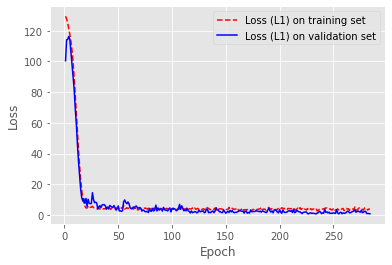

Prediction
[[122.11754]
 [ 69.59881]
 [164.43027]
 [122.63037]
 [221.38863]]
True Values
304     151.260
2596     97.420
2958    171.490
5423    120.965
3369    248.415
Name: 0, dtype: float64
Model Evaluation
2000/2000 - 0s - loss: 1342.4384 - mae: 24.6607 - mse: 1342.4386
[1342.4384443359374, 24.660744, 1342.4386]


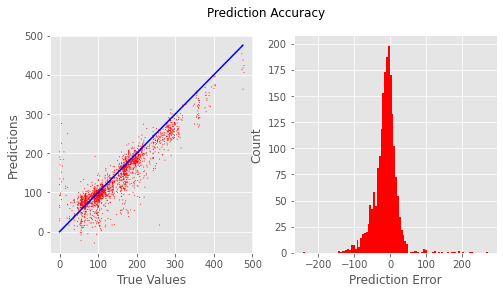

In [7]:
# Plot the training process
training_loss = history.history["mae"]
val_loss = history.history["val_mae"]
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)
# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, val_loss, "b-")
plt.legend(["Loss (L1) on training set", "Loss (L1) on validation set"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.savefig('history_spot_many_options.eps', format='eps')
plt.show()

# Make a single Prediction
indices = [max(round(float(np.random.sample(1)*(len(X_test)-1))),0) for i in range(5)]
print("Prediction")
print(model.predict(X_test_scaled[indices]))
print("True Values")
print(y_test.iloc[indices])



# Plot the errors
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
#Along a line
test_predictions = model.predict(X_test_scaled).flatten()
#a = plt.axes(aspect='equal')
axs[0].plot([0,max(test_predictions)],[0,max(test_predictions)],color = "blue")
axs[0].scatter(y_test, test_predictions, c='red',s=1, edgecolors='None')
axs[0].set_xlabel('True Values')
axs[0].set_ylabel('Predictions')

# Histogram
error = np.array(model.predict(X_test_scaled).reshape(-1,) - np.array(y_test)).flatten()
axs[1].hist(error, bins = 100,color = 'red')
axs[1].set_xlabel("Prediction Error")
axs[1].set_ylabel("Count")
fig.suptitle('Prediction Accuracy')
plt.savefig('accuracy_spot_many_options.eps', format='eps')

# Model Evaluation
print("Model Evaluation")
print(model.evaluate(X_test_scaled, y_test, verbose=2))
# Percentage Error

## Relative Error

Model Evaluation 
 
Relative Mean absolute Error:
0.010059604356047054


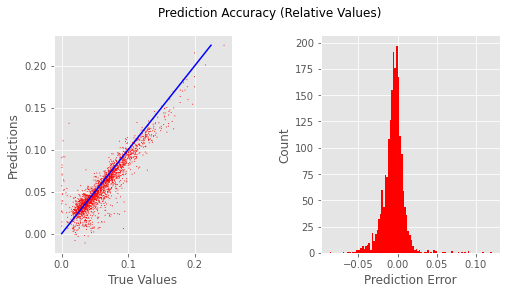

In [8]:
# Plot the errors
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
plt.subplots_adjust(wspace=0.5)

weighted_sum = np.sum([X_test.iloc[:,i]*X_test.iloc[:,30+i] for i in range(1,31)],0)
#Along a line
test_predictions_relative =  model.predict(X_test_scaled).flatten('F')/weighted_sum
y_test_relative =  np.array(y_test).flatten('F')/weighted_sum

#a = plt.axes(aspect='equal')
axs[0].plot([0,max(test_predictions_relative)],[0,max(test_predictions_relative)],color = "blue")
axs[0].scatter(y_test_relative, test_predictions_relative,c='red',s=1, edgecolors='None')
axs[0].set_xlabel('True Values')
axs[0].set_ylabel('Predictions')


# Histogram
error = np.array(test_predictions_relative - y_test_relative)
axs[1].hist(error, bins = 100,color='red')
axs[1].set_xlabel("Prediction Error")
axs[1].set_ylabel("Count")
fig.suptitle('Prediction Accuracy (Relative Values)')
plt.savefig('accuracy_relative_spot_many_options.eps', format='eps')

# Evaluate the model
print("Model Evaluation \n \nRelative Mean absolute Error:")
print(np.mean(np.abs(test_predictions_relative - y_test_relative)))

Finally save the model

In [9]:
model.save("model_basket_many_options.h5")